In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch  # 加利福尼亚房屋价值数据集
import pandas as pd

In [2]:
housevalue = fch()  # 会需要下载，大家可以提前运行试试看

In [3]:
housevalue.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
housevalue.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
housevalue.target_names

['MedHouseVal']

In [6]:
X = pd.DataFrame(housevalue.data)  # 放入DataFrame中便于查看

In [7]:
X.shape

(20640, 8)

In [8]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
y = housevalue.target

In [12]:
y.min()

0.14999

In [13]:
y.max()

5.00001

In [14]:
y.shape

(20640,)

MedInc：该街区住户的收入中位数  
HouseAge：该街区房屋使用年代的中位数  
AveRooms：该街区平均的房间数目  
AveBedrms：该街区平均的卧室数目  
Population：街区人口  
AveOccup：平均入住率  
Latitude：街区的纬度  
Longitude：街区的经度

In [15]:
X.columns = housevalue.feature_names  # 特征名字
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)

In [17]:
Xtest.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5156,1.7656,42.0,4.144703,1.031008,1581.0,4.085271,33.96,-118.28
19714,1.5281,29.0,5.095890,1.095890,1137.0,3.115068,39.29,-121.68
18471,4.1750,14.0,5.604699,1.045965,2823.0,2.883555,37.14,-121.64
16156,3.0278,52.0,5.172932,1.085714,1663.0,2.500752,37.78,-122.49
7028,4.5000,36.0,4.940447,0.982630,1306.0,3.240695,33.95,-118.09


In [18]:
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17073,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
16956,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
20012,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
13072,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
8457,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [19]:
# 恢复索引
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [20]:
Xtrain.shape

(14448, 8)

In [21]:
# 如果希望进行数据标准化，还记得应该怎么做吗？
# 先用训练集训练(fit)标准化的类，然后用训练好的类分别转化(transform)训练集和测试集

In [22]:
reg = LR().fit(Xtrain, Ytrain)

In [23]:
yhat = reg.predict(Xtest)

In [24]:
yhat.min()

-0.6528439725035966

In [25]:
yhat.max()

7.146198214270861

In [26]:
reg.coef_  # w,系数向量

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [27]:
[*zip(Xtrain.columns, reg.coef_)]

[('MedInc', 0.43735893059684033),
 ('HouseAge', 0.010211268294493994),
 ('AveRooms', -0.10780721617317697),
 ('AveBedrms', 0.6264338275363783),
 ('Population', 5.216125353261353e-07),
 ('AveOccup', -0.003348509646333585),
 ('Latitude', -0.41309593789477195),
 ('Longitude', -0.42621095362084704)]

MedInc：该街区住户的收入中位数  
HouseAge：该街区房屋使用年代的中位数  
AveRooms：该街区平均的房间数目  
AveBedrms：该街区平均的卧室数目  
Population：街区人口  
AveOccup：平均入住率  
Latitude：街区的纬度  
Longitude：街区的经度

In [28]:
reg.intercept_

-36.256893229203875

## 回归类的模型评估指标

### 是否预测到了正确的数值

In [29]:
from sklearn.metrics import mean_squared_error as MSE

In [30]:
MSE(yhat, Ytest)

0.5309012639324571

In [31]:
MSE(Ytest, yhat)

0.5309012639324571

In [32]:
Ytest.mean()

2.0819292877906976

In [33]:
y.max()

5.00001

In [34]:
y.min()

0.14999

In [35]:
cross_val_score(reg, X, y, cv=10, scoring='mean_suqared_error')

ValueError: 'mean_suqared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [37]:
# 为什么报错了？来试试看！
import sklearn
sklearn.metrics.SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc

In [39]:
cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error').mean()

-0.5509524296956597

### 是否拟合到了足够的信息

In [40]:
# 调用R2
from sklearn.metrics import r2_score
r2_score(yhat, Ytest)

0.3380653761556006

In [41]:
r2 = reg.score(Xtest, Ytest)
r2

0.6043668160178817

In [44]:
r2_score(Ytest, yhat)

0.6043668160178817

In [46]:
# 或者你也可以指定参数，就不必在意顺序了
r2_score(y_true=Ytest, y_pred=yhat)

0.6043668160178817

In [47]:
cross_val_score(reg, X, y, cv=10, scoring='r2').mean()

0.5110068610524551

In [48]:
import matplotlib.pyplot as plt

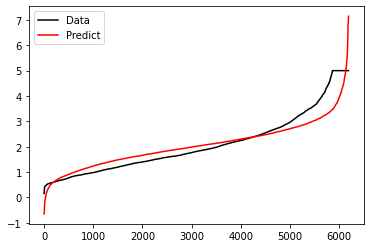

In [60]:
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

####  负的R^2

In [61]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-180.050132  ,   -5.73420681,  -15.35002175,  -77.7207388 ,
        -65.13476651])